In this notebook we visualise and analyse the results from an experiment. For several combinatorial problems, we have written constructive heuristics in a common framework, similar to GRASP, suitable for plugging-in to PTO. Since they are in a common framework, they are comparable in some ways across problems and instances. All are parameterised by a single parameter $\alpha$ which controls how greedy they are.

We have:

* Four problems: JSSP, KNAPSACK
* Six instances per problem of varying size
* Four solvers: RS, HC, EA, MGA
* Two PTO repair mechanisms: one allowing a strong re-use of material, and one allowing weak re-use
* Five values for $\alpha$: 0.0, 0.1, 0.5, 0.9, 1.0

We carry out each combination of parameters 30 times.

The total runtime was a 4 weeks on SPECS cloud server

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import MaxNLocator

%matplotlib inline
sns.set()

A typical line from our results file:

`GRASP_KNAPSACK	knapsack-random-instance-PTO-80	80	stepuniform	1.0	RS	True	True	20000	12	1606457200.5803127	13.623185873031616	727	[9, 16, 15, 4, 8, 45, 38, 2, 3, 7, 0, 1]`


In [6]:
names = ["problem", "instance", "size", "distribution", 
         "alpha", "solver", "strong_reuse", "str_trace", 
         "budget", "rep", "start_time", "elapsed_time", 
         "obj", "solution"]
filename = "EvoCOP_results_joe.dat"
d = pd.read_csv(filename, delimiter="\t", names=names)

In [7]:
d.head()

,problem,instance,size,distribution,alpha,solver,strong_reuse,str_trace,budget,rep,start_time,elapsed_time,obj,solution
0,GRASP_JSSP,abz5,10,stepuniform,0.0,EA,True,True,20000,0,1.604423e+09,245.558317,-1745,"{7: [(6, 7, 50), (3, 7, 144), (9, 7, 314), (8,..."
1,GRASP_JSSP,abz5,10,stepuniform,0.0,EA,True,True,20000,1,1.604423e+09,245.055994,-1745,"{3: [(9, 3, 50), (4, 3, 119), (1, 3, 169), (8,..."
2,GRASP_JSSP,abz5,10,stepuniform,0.0,EA,True,True,20000,10,1.604425e+09,234.699654,-1745,"{3: [(9, 3, 50), (4, 3, 119), (1, 3, 169), (8,..."
3,GRASP_JSSP,abz5,10,stepuniform,0.0,EA,True,True,20000,11,1.604425e+09,240.609405,-1745,"{3: [(9, 3, 50), (4, 3, 119), (1, 3, 169), (8,..."
4,GRASP_JSSP,abz5,10,stepuniform,0.0,EA,True,True,20000,12,1.604426e+09,235.356859,-1745,"{7: [(6, 7, 50), (3, 7, 144), (9, 7, 314), (8,..."


In [8]:
len(d)

7200

In [9]:
set(d["instance"])

{'abz5',
 'abz6',
 'abz7',
 'abz8',
 'abz9',
 'knapsack-random-instance-PTO-10',
 'knapsack-random-instance-PTO-160',
 'knapsack-random-instance-PTO-20',
 'knapsack-random-instance-PTO-320',
 'knapsack-random-instance-PTO-40',
 'knapsack-random-instance-PTO-80',
 'yn1'}

In [10]:
problems = ["JSSP", "KNAPSACK"]
instances = {
    "JSSP": ['abz5','abz6','abz7','abz8','abz9','yn1'],
    "KNAPSACK": [ 
        'knapsack-random-instance-PTO-10',
        'knapsack-random-instance-PTO-20',
        'knapsack-random-instance-PTO-40',
        'knapsack-random-instance-PTO-80',
        'knapsack-random-instance-PTO-160',
        'knapsack-random-instance-PTO-320',
    ]
}

def map_inst_name(name):
    if "knapsack" in name:
        size = name.split("-")[-1]
        return "knapsack-rnd-" + size
    else:
        return name

solvers = ["RS", "HC", "EA", "MGA"]
alpha_vals = sorted(list(set(d["alpha"].values)))
strong_reuse_vals = [True]
distribution_vals = ["stepuniform"] 

writing to  abz5


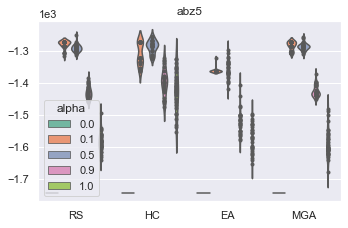

writing to  abz6


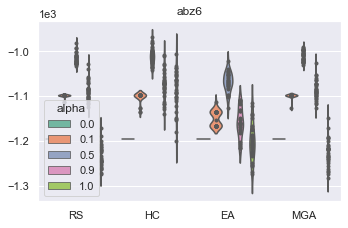

writing to  abz7


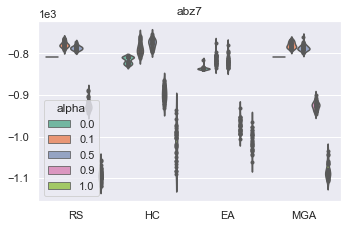

writing to  abz8


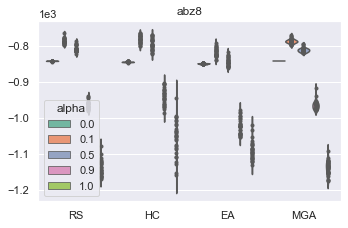

writing to  abz9


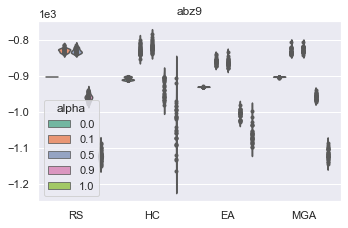

writing to  yn1


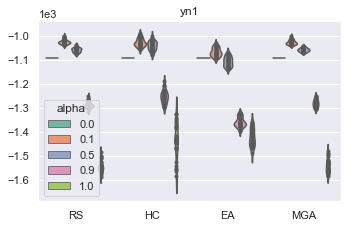

writing to  knapsack-rnd-10


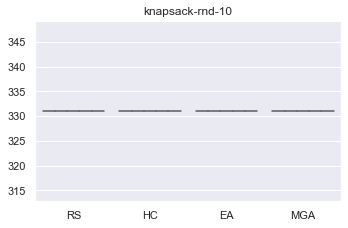

writing to  knapsack-rnd-20


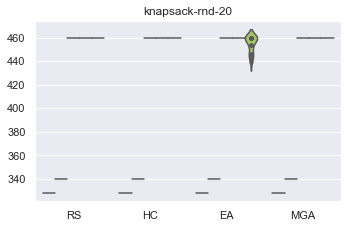

writing to  knapsack-rnd-40


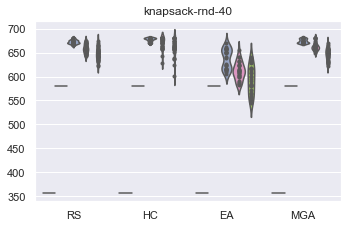

writing to  knapsack-rnd-80


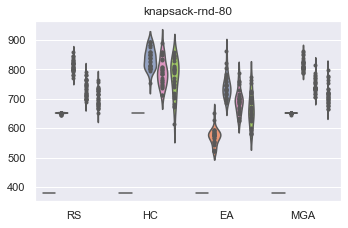

writing to  knapsack-rnd-160


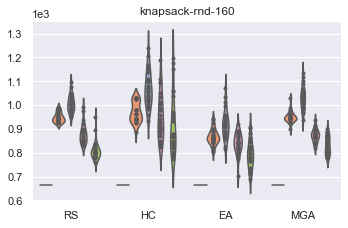

writing to  knapsack-rnd-320


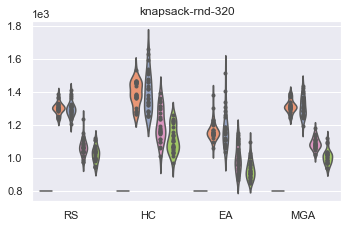

In [12]:
make_legend = True
for problem in problems:
    for i, inst in enumerate(instances[problem]):
        dtmp = d[(d["instance"] == inst) & (d["strong_reuse"] == True)]
        #dtmp = dtmp.assign(Generator=dtmp.generator.map(gen_name)) 
        #dtmp = [dtmp[(d["solver"] == solver) & (d["generator"] == generator)]["obj"] for solver in solvers for generator in generators]
        sns.violinplot(x="solver", hue="alpha", y="obj", data=dtmp, order=solvers, inner="points",
                      palette=sns.color_palette("Set2", 10))
    
        plt.ylabel("")
        #labels = ["%s, %s" % (solver, gen_name[generator]) for solver in solvers for generator in generators]
        title = map_inst_name(inst)
        plt.title(title)
        fig = plt.gcf()
        fig.set_size_inches(5, 3.33)
        ax = plt.gca()
        ax.set_xlabel("")
        #fmt = FormatStrFormatter('%1.1f')
        #fmt.use_offset(True)
        #ax.yaxis.set_major_formatter(fmt)
        #ax.get_yaxis().get_major_formatter().set_useOffset(True)
        #locater = MaxNLocator(nbins=4)
        #ax.yaxis.set_major_locator(locater)
        fmt = ScalarFormatter()
        fmt.set_powerlimits((-3, 3))
        ax.yaxis.set_major_formatter(fmt)
        #ax.get_yaxis().ticklabel_format(useOffset=False)
        if not make_legend:
            plt.gca().legend().remove()
        plt.tight_layout()
        print("writing to ", title)
        plt.savefig("img/strong_reuse_solver_by_alpha/%s.pdf" % title)
        plt.show()
        plt.close()
    make_legend = False

## HC Solver

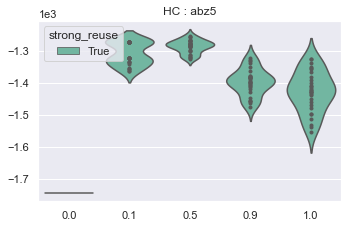

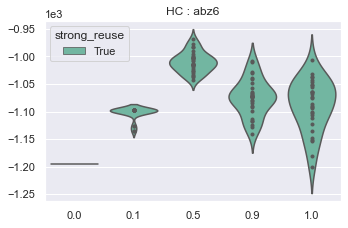

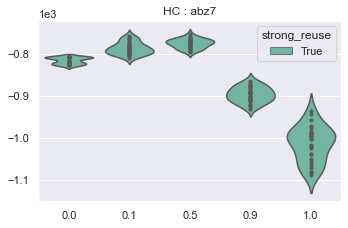

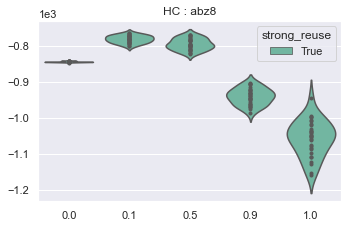

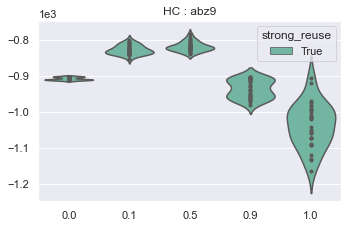

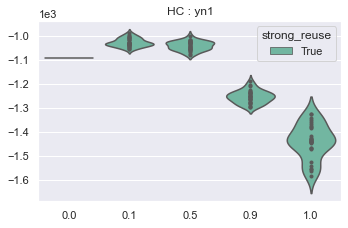

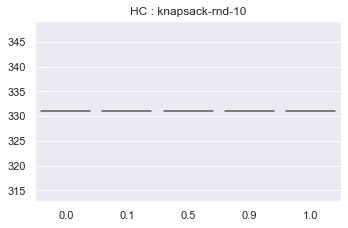

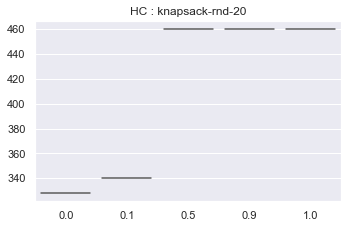

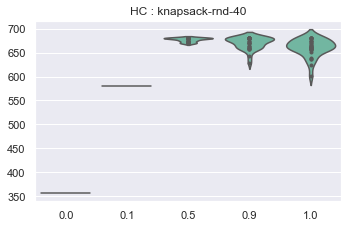

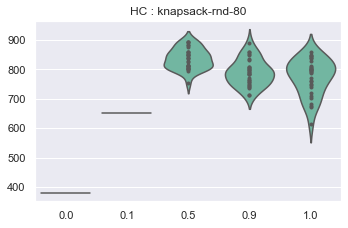

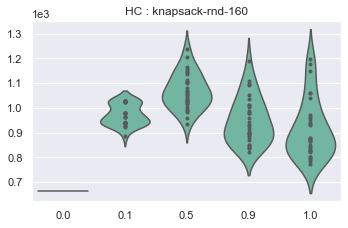

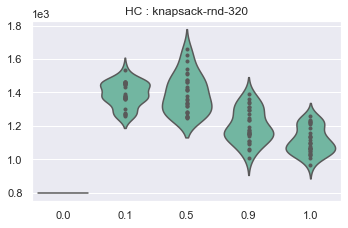

In [22]:
solvers = ["HC"]

make_legend = True
for problem in problems:
    for i, inst in enumerate(instances[problem]):
        for solver in solvers:
            dtmp = d[(d["instance"] == inst) & (d["solver"] == solver)]
            #dtmp = dtmp.assign(Generator=dtmp.generator.map(gen_name)) 
            #dtmp = [dtmp[(d["solver"] == solver) & (d["generator"] == generator)]["obj"] for solver in solvers for generator in generators]
            sns.violinplot(x="alpha", hue="strong_reuse", y="obj", data=dtmp,  inner="points",
                          palette=sns.color_palette("Set2", 10))

            plt.ylabel("")
            title = solver + " : " + map_inst_name(inst)
            plt.title(title)
            fig = plt.gcf()
            fig.set_size_inches(5, 3.33)
            ax = plt.gca()
            ax.set_xlabel("")
            #fmt = FormatStrFormatter('%1.1f')
            #fmt.use_offset(True)
            #ax.yaxis.set_major_formatter(fmt)
            #ax.get_yaxis().get_major_formatter().set_useOffset(True)
            #locater = MaxNLocator(nbins=4)
            #ax.yaxis.set_major_locator(locater)
            fmt = ScalarFormatter()
            fmt.set_powerlimits((-3, 3))
            ax.yaxis.set_major_formatter(fmt)
            #ax.get_yaxis().ticklabel_format(useOffset=False) 
            if not make_legend:
                plt.gca().legend().remove()
            plt.tight_layout()
            plt.savefig("img/strong_reuse_solver_by_alpha/%s.pdf" % title.replace(" : ", "_"))
            plt.show()
            plt.close()
    make_legend = False


## RS Solver

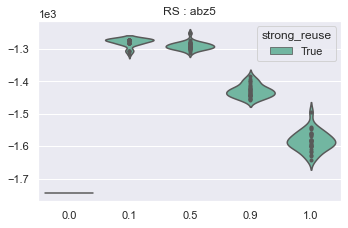

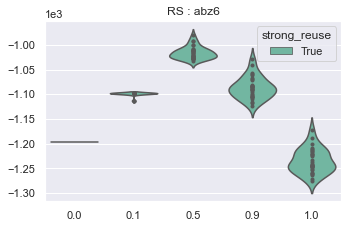

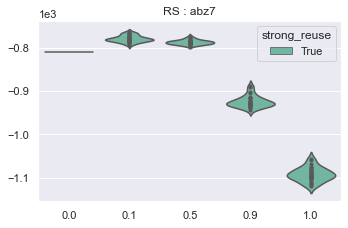

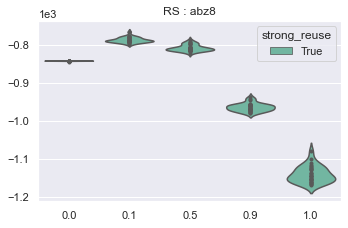

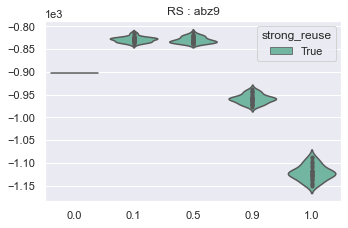

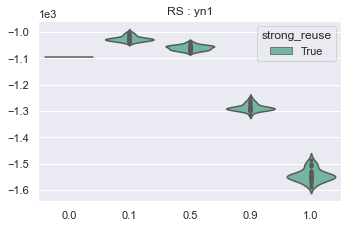

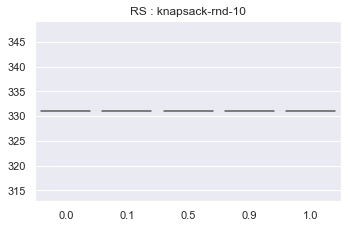

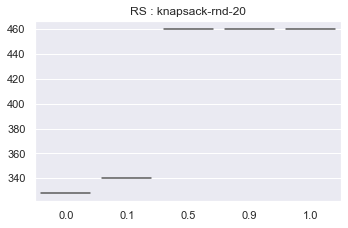

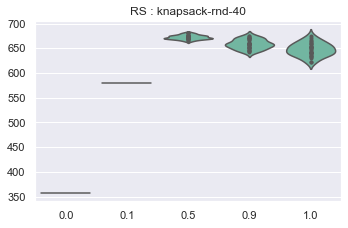

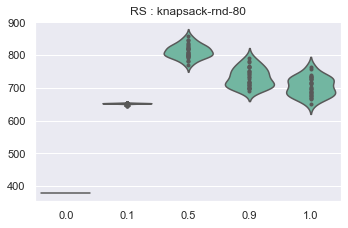

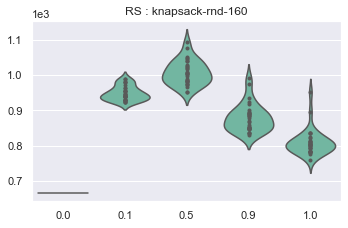

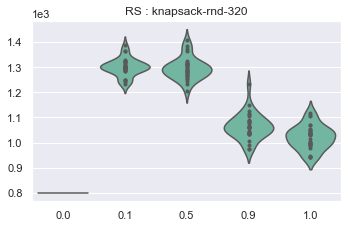

In [23]:
solvers = ["RS"]

make_legend = True
for problem in problems:
    for i, inst in enumerate(instances[problem]):
        for solver in solvers:
            dtmp = d[(d["instance"] == inst) & (d["solver"] == solver)]
            #dtmp = dtmp.assign(Generator=dtmp.generator.map(gen_name)) 
            #dtmp = [dtmp[(d["solver"] == solver) & (d["generator"] == generator)]["obj"] for solver in solvers for generator in generators]
            sns.violinplot(x="alpha", hue="strong_reuse", y="obj", data=dtmp,  inner="points",
                          palette=sns.color_palette("Set2", 10))

            plt.ylabel("")
            title = solver + " : " + map_inst_name(inst)
            plt.title(title)
            fig = plt.gcf()
            fig.set_size_inches(5, 3.33)
            ax = plt.gca()
            ax.set_xlabel("")
            #fmt = FormatStrFormatter('%1.1f')
            #fmt.use_offset(True)
            #ax.yaxis.set_major_formatter(fmt)
            #ax.get_yaxis().get_major_formatter().set_useOffset(True)
            #locater = MaxNLocator(nbins=4)
            #ax.yaxis.set_major_locator(locater)
            fmt = ScalarFormatter()
            fmt.set_powerlimits((-3, 3))
            ax.yaxis.set_major_formatter(fmt)
            #ax.get_yaxis().ticklabel_format(useOffset=False) 
            if not make_legend:
                plt.gca().legend().remove()
            plt.tight_layout()
            plt.savefig("img/strong_reuse_solver_by_alpha/%s.pdf" % title.replace(" : ", "_"))
            plt.show()
            plt.close()
    make_legend = False


## EA Solver

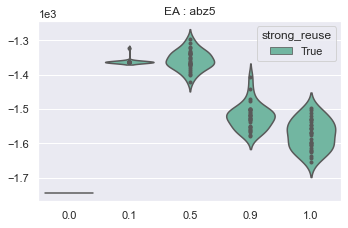

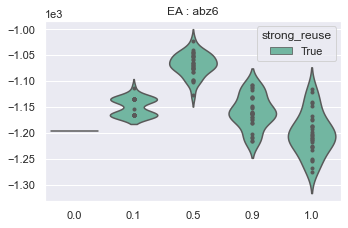

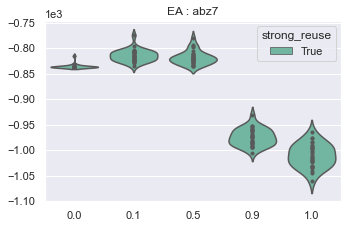

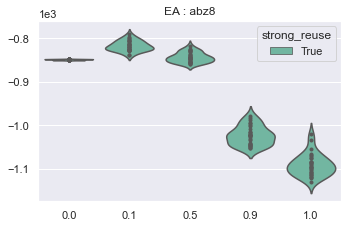

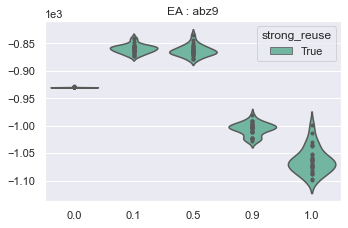

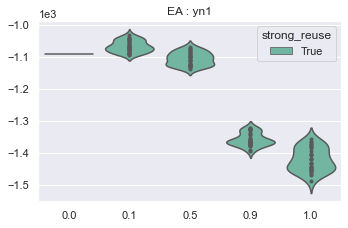

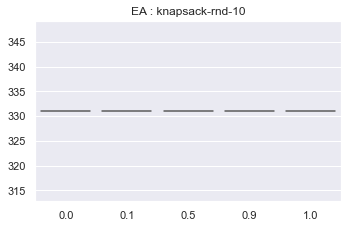

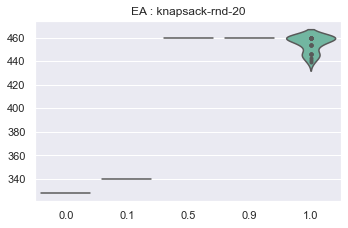

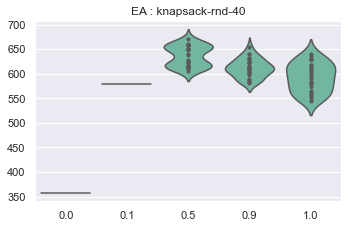

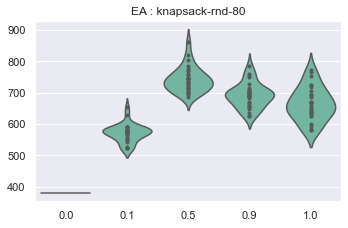

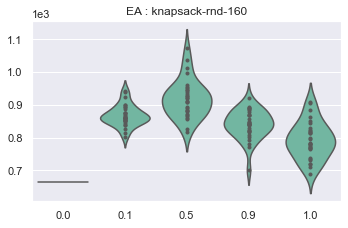

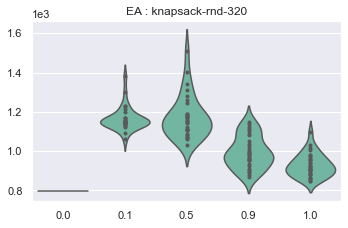

In [25]:
solvers = ["EA"]

make_legend = True
for problem in problems:
    for i, inst in enumerate(instances[problem]):
        for solver in solvers:
            dtmp = d[(d["instance"] == inst) & (d["solver"] == solver)]
            #dtmp = dtmp.assign(Generator=dtmp.generator.map(gen_name)) 
            #dtmp = [dtmp[(d["solver"] == solver) & (d["generator"] == generator)]["obj"] for solver in solvers for generator in generators]
            sns.violinplot(x="alpha", hue="strong_reuse", y="obj", data=dtmp,  inner="points",
                          palette=sns.color_palette("Set2", 10))

            plt.ylabel("")
            title = solver + " : " + map_inst_name(inst)
            plt.title(title)
            fig = plt.gcf()
            fig.set_size_inches(5, 3.33)
            ax = plt.gca()
            ax.set_xlabel("")
            #fmt = FormatStrFormatter('%1.1f')
            #fmt.use_offset(True)
            #ax.yaxis.set_major_formatter(fmt)
            #ax.get_yaxis().get_major_formatter().set_useOffset(True)
            #locater = MaxNLocator(nbins=4)
            #ax.yaxis.set_major_locator(locater)
            fmt = ScalarFormatter()
            fmt.set_powerlimits((-3, 3))
            ax.yaxis.set_major_formatter(fmt)
            #ax.get_yaxis().ticklabel_format(useOffset=False) 
            if not make_legend:
                plt.gca().legend().remove()
            plt.tight_layout()
            plt.savefig("img/strong_reuse_solver_by_alpha/%s.pdf" % title.replace(" : ", "_"))
            plt.show()
            plt.close()
    make_legend = False


## MGA Solver

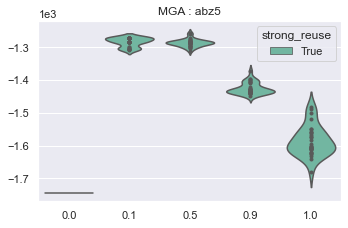

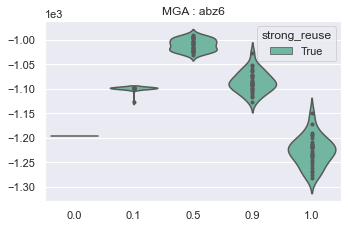

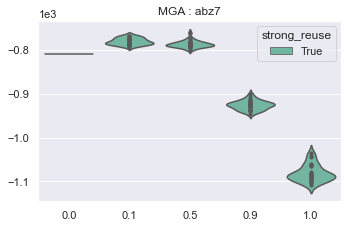

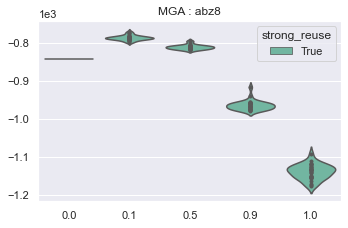

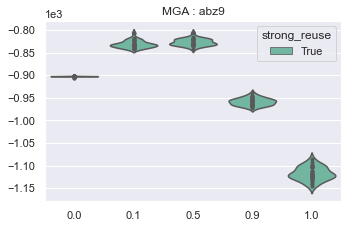

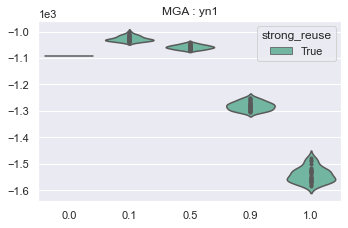

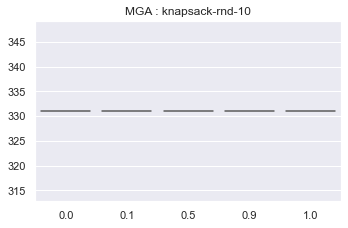

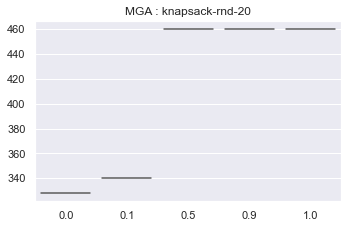

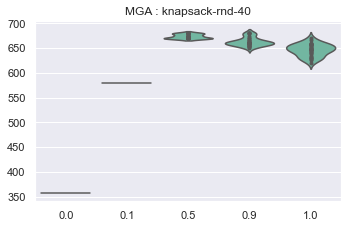

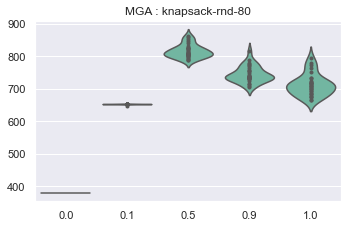

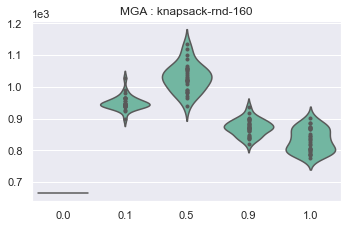

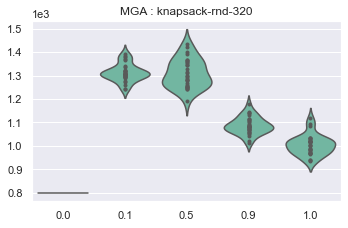

In [26]:
solvers = ["MGA"]

make_legend = True
for problem in problems:
    for i, inst in enumerate(instances[problem]):
        for solver in solvers:
            dtmp = d[(d["instance"] == inst) & (d["solver"] == solver)]
            #dtmp = dtmp.assign(Generator=dtmp.generator.map(gen_name)) 
            #dtmp = [dtmp[(d["solver"] == solver) & (d["generator"] == generator)]["obj"] for solver in solvers for generator in generators]
            sns.violinplot(x="alpha", hue="strong_reuse", y="obj", data=dtmp,  inner="points",
                          palette=sns.color_palette("Set2", 10))

            plt.ylabel("")
            title = solver + " : " + map_inst_name(inst)
            plt.title(title)
            fig = plt.gcf()
            fig.set_size_inches(5, 3.33)
            ax = plt.gca()
            ax.set_xlabel("")
            #fmt = FormatStrFormatter('%1.1f')
            #fmt.use_offset(True)
            #ax.yaxis.set_major_formatter(fmt)
            #ax.get_yaxis().get_major_formatter().set_useOffset(True)
            #locater = MaxNLocator(nbins=4)
            #ax.yaxis.set_major_locator(locater)
            fmt = ScalarFormatter()
            fmt.set_powerlimits((-3, 3))
            ax.yaxis.set_major_formatter(fmt)
            #ax.get_yaxis().ticklabel_format(useOffset=False) 
            if not make_legend:
                plt.gca().legend().remove()
            plt.tight_layout()
            plt.savefig("img/strong_reuse_solver_by_alpha/%s.pdf" % title.replace(" : ", "_"))
            plt.show()
            plt.close()
    make_legend = False


Problem & Instance & Size & Solver & Re-use & $\alpha$ & Obj & Time (s)\\
\hline\\


TypeError: %d format: a number is required, not Series